# **Spotify Top 50 Tracks 2020 Analysis**
## Introduction

This project explores the Top 50 most popular Spotify songs of 2020, focusing on their audio features using pandas in Python. The analysis was done using Jupyter Notebook and Google Colab, without any visualizations - the focus was on understanding the data through code, filtering, grouping, and correlation.

## Project Goals:

* Analyze audio features such as danceability, energy, loudness, acousticness, etc.

* Compare genres to understand which musical characteristics are most common in the Top 50.

* Identify correlations between features (e.g., energy and loudness).

* Practice real-world data analysis using pandas.

## Key Insights:

**Pop** is the most frequent genre in the Top 50, followed by Hip-Hop/Rap.

**Dance/Electronic and Hip-Hop/Rap** songs have the highest danceability scores.

**Energy and loudness** show a strong positive correlation (0.79), while **energy and acousticness** are strongly negatively correlated (-0.68).

Most other features have weak or no correlation, suggesting they vary independently.

## Tools Used:

Python & pandas

Jupyter Notebook / Google Colab

Dataset: [Kaggle - Top 50 Spotify Songs of 2020](https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020)

### Data Loading

In [ ]:
import pandas as pd
df = pd.read_csv('spotifytoptracks.csv')
df.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


### Data Cleaning

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         50 non-null     int64   
 1   artist             50 non-null     object  
 2   album              50 non-null     object  
 3   track_name         50 non-null     object  
 4   track_id           50 non-null     object  
 5   energy             50 non-null     float64 
 6   danceability       50 non-null     float64 
 7   key                50 non-null     int64   
 8   loudness           50 non-null     float64 
 9   acousticness       50 non-null     float64 
 10  speechiness        50 non-null     float64 
 11  instrumentalness   50 non-null     float64 
 12  liveness           50 non-null     float64 
 13  valence            50 non-null     float64 
 14  tempo              50 non-null     float64 
 15  duration_ms        50 non-null     int64   
 16  genre     

We checked for missing values. All rows are complete across all columns, so no missing data was found.

In [ ]:
df.duplicated().sum()

np.int64(0)

We checked for duplicate rows. The result showed 0 duplicates, meaning all songs in the dataset are unique.

In [ ]:
desc = df.describe().round(3).drop('count', axis=0).drop('Unnamed: 0', axis=1)
desc


,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
mean,0.609,0.717,5.720,-6.226,0.256,0.124,0.016,0.197,0.556,119.690,199955.360
std,0.154,0.125,3.709,2.350,0.265,0.117,0.094,0.177,0.216,25.415,33996.122
min,0.225,0.351,0.000,-14.454,0.001,0.029,0.000,0.057,0.060,75.801,140526.000
25%,0.494,0.673,2.000,-7.552,0.053,0.048,0.000,0.094,0.434,99.557,175845.500
50%,0.597,0.746,6.500,-5.992,0.188,0.070,0.000,0.111,0.560,116.969,197853.500
75%,0.730,0.794,8.750,-4.286,0.299,0.156,0.000,0.271,0.726,132.317,215064.000
max,0.855,0.935,11.000,-3.280,0.934,0.487,0.657,0.792,0.925,180.067,312820.000


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        outlier_summary[col] = {
            'count': outliers.shape[0],
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_values': outliers[col].values
        }

for col, info in outlier_summary.items():
    print(f"\nColumn: {col}")
    print(f"Outlier(s): {info['count']}")
    print(f"Limits: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")
    print(f"Values: {info['outlier_values']}")



Column: danceability
Outlier(s): 3
Limits: [0.49, 0.98]
Values: [0.459 0.351 0.464]

Column: loudness
Outlier(s): 1
Limits: [-12.45, 0.62]
Values: [-14.454]

Column: acousticness
Outlier(s): 7
Limits: [-0.32, 0.67]
Values: [0.688 0.731 0.751 0.837 0.902 0.934 0.866]

Column: speechiness
Outlier(s): 6
Limits: [-0.11, 0.32]
Values: [0.487 0.375 0.375 0.342 0.389 0.379]

Column: instrumentalness
Outlier(s): 12
Limits: [-0.00, 0.00]
Values: [9.54e-05 1.61e-04 4.32e-03 1.34e-04 2.44e-03 6.57e-01 1.30e-01 2.09e-04
 1.88e-03 6.43e-05 1.09e-03 6.58e-04]

Column: liveness
Outlier(s): 3
Limits: [-0.17, 0.54]
Values: [0.79  0.696 0.792]

Column: duration_ms
Outlier(s): 2
Limits: [117017.75, 273891.75]
Values: [295177 312820]


**Danceability**: 3 songs have lower danceability levels - they might be slower or less suitable for dancing.

**Loudness**: One track is significantly quieter than the others - it could be a calm or acoustic-style song.

**Acousticness**: 7 songs show high acoustic values, indicating a more natural, less electronic sound.

**Speechiness**: 6 songs contain a lot of spoken elements - these are likely rap tracks.

**Instrumentalness**: As many as 12 songs have higher instrumental values - some of them might be mostly or entirely without vocals.

**Liveness**: 3 songs appear to be live performances, based on their high liveness scores.

**Duration**: 2 songs are much longer than average - both exceed 5 minutes.

These outliers highlight that even the most popular songs can vary greatly in style - from live performances to instrumental or acoustic pieces.

## Dataset Structure

In [ ]:
df.shape

print(f'Number of observations: {df.shape[0]} (each row represents one song)')
print(f'Number of features: {df.shape[1]}')

Number of observations: 50 (each row represents one song)
Number of features: 17


## Data Types

In [ ]:
print('In total, the dataset contains:')
for dtype in ['object', 'int64', 'float64']:
    columns = df.select_dtypes(include=dtype).columns
    print(f"{len(columns)} {dtype} columns: {', '.join(columns)}.")


In total, the dataset contains:
5 object columns: artist, album, track_name, track_id, genre.
3 int64 columns: Unnamed: 0, key, duration_ms.
9 float64 columns: energy, danceability, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo.


## Artists

**How many unique artists are there in total?**

In [ ]:
f'Here is {df["artist"].nunique()} unique artist.'

'Here is 40 unique artist.'

**Are there any artists with more than one popular song?**

In [ ]:
popular_artist = df['artist'].value_counts()
multiply_song = popular_artist[popular_artist > 1]

print(f'Yes - {len(multiply_song)} artists have more than one song featured in the Top 50 list:')
print(multiply_song.to_string(header=False))

Yes - 7 artists have more than one song featured in the Top 50 list:
Dua Lipa         3
Billie Eilish    3
Travis Scott     3
Harry Styles     2
Lewis Capaldi    2
Justin Bieber    2
Post Malone      2


**Who was the most popular artist?**

In [ ]:
popular_artist = df['artist'].value_counts()
max_count = popular_artist.max()
most_popular_artist = popular_artist[
    popular_artist == max_count].index.to_list()

print(f'The most popular artist(s): {", ".join(most_popular_artist)} with {max_count} songs.')


The most popular artist(s): Dua Lipa, Billie Eilish, Travis Scott with 3 songs.


## Albums

**How many unique albums are there in total?**

In [ ]:
print(f'There are {df["album"].nunique()} unique albums represented in the dataset.')

There are 45 unique albums represented in the dataset.


**Are there any albums with more than one Top 50 song?**

In [ ]:
popular_album = df['album'].value_counts()
multiply_song = popular_album[popular_album > 1]

print(f'Yes - {len(multiply_song)} albums have more than one song featured in the Top 50 list:')
print(multiply_song.to_string(header=False))


Yes - 4 albums have more than one song featured in the Top 50 list:
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2


From the initial data exploration, we can see that the dataset is well-structured and contains a mix of categorical and numerical features. The data includes a wide variety of artists (40 unique ones), but a few stand out with multiple tracks, such as Dua Lipa, Billie Eilish, and Travis Scott - each having 3 songs in the Top 50. Similarly, while most albums only feature one track, 4 albums stand out with multiple popular songs.

This suggests that popularity might be influenced by certain artists or albums, and it's worth exploring whether these tracks share common audio characteristics. In the next section, we will analyze the audio features across genres to identify patterns and key differences.

## Danceability and Loudness Analysis

**Which tracks have a danceability score above 0.7?**

In [ ]:
danceability = df[df['danceability'] > 0.7]

print(f'There are {len(danceability)} tracks with a danceability score higher than 0.7. List of songs:')
print(danceability[['artist', 'track_name']].to_string(index=False))


There are 32 tracks with a danceability score higher than 0.7. List of songs:
         artist                                    track_name
    Tones And I                                  Dance Monkey
    Roddy Ricch                                       The Box
      SAINt JHN                         Roses - Imanbek Remix
       Dua Lipa                               Don't Start Now
         DaBaby                  ROCKSTAR (feat. Roddy Ricch)
          Powfu              death bed (coffee for your head)
  Trevor Daniel                                       Falling
        KAROL G                                          Tusa
      Lil Mosey                               Blueberry Faygo
  Justin Bieber                      Intentions (feat. Quavo)
          Drake                                  Toosie Slide
       Doja Cat                                        Say So
       Maroon 5                                      Memories
         Future                    Life Is Good (feat.

**Which tracks have a danceability score below 0.4?**

In [ ]:
dance = df[df['danceability'] < 0.4]

print(f'There are {len(dance)} track(s) with a danceability score lower than 0.4.')
print(dance[['artist', 'track_name']].to_string(index=False, header=False))


There are 1 track(s) with a danceability score lower than 0.4.
Billie Eilish lovely (with Khalid)


**Which tracks have a loudness above -5?**

In [ ]:
loudness_5 = df[df['loudness'] < -5]

print(f'There are {len(loudness_5)} track(s) with a loudness score lower than -5. List of songs: ')
print(loudness_5[['artist', 'track_name']].to_string(index=False))

There are 31 track(s) with a loudness score lower than -5. List of songs: 
         artist                                     track_name
     The Weeknd                                Blinding Lights
    Tones And I                                   Dance Monkey
    Roddy Ricch                                        The Box
      SAINt JHN                          Roses - Imanbek Remix
         DaBaby                   ROCKSTAR (feat. Roddy Ricch)
          Powfu               death bed (coffee for your head)
  Trevor Daniel                                        Falling
  Lewis Capaldi                              Someone You Loved
 Arizona Zervas                                        ROXANNE
      Lil Mosey                                Blueberry Faygo
  Justin Bieber                       Intentions (feat. Quavo)
          Drake                                   Toosie Slide
       Maroon 5                                       Memories
         Future                     Life Is

**Which tracks have loudness below -8?**

In [ ]:
loundness_8 = df[df['loudness'] < -8]

print(f'There are {len(loundness_8)} track(s) with loudness below -8. List of songs: ')
print(loundness_8[['artist', 'track_name']].to_string(index=False))

There are 9 track(s) with loudness below -8. List of songs: 
       artist                                     track_name
        Powfu               death bed (coffee for your head)
Trevor Daniel                                        Falling
        Drake                                   Toosie Slide
    Jawsh 685               Savage Love (Laxed - Siren Beat)
Billie Eilish                            everything i wanted
Billie Eilish                                        bad guy
 Travis Scott                            HIGHEST IN THE ROOM
Billie Eilish                           lovely (with Khalid)
      JP Saxe If the World Was Ending - feat. Julia Michaels


Analyzing the top 50 songs, it is noticeable that the majority of songs have a high danceability score (above 0.7), and many also have a low loudness score (below -5). This suggests that popular songs are energetic but not overly loud. On the other hand, only one song has a very low danceability score (below 0.4), which indicates that less popular songs tend to be slower and less danceable, with lower danceability scores.

# Track Length

In [ ]:
shortest = df.duration_ms.idxmin()
longest = df.duration_ms.idxmax()
shortest_row = df.loc[shortest]
longest_row = df.loc[longest]

print(f'The shortest track is {shortest_row["track_name"]} by {shortest_row["artist"]} with {shortest_row["duration_ms"]} milliseconds.')
print(f'The longest track is {longest_row["track_name"]} by {longest_row["artist"]} with {longest_row["duration_ms"]} milliseconds.')

The shortest track is Mood (feat. iann dior) by 24kGoldn with 140526 milliseconds.
The longest track is SICKO MODE by Travis Scott with 312820 milliseconds.


In [ ]:
df['duration_category'] = pd.cut(df['duration_ms'],
                                 bins=[0, 180000, 240000, float('inf')],
                                 labels=['Short', 'Medium', 'Long'])

duration_counts = df['duration_category'].value_counts()
print(f'The songs are categorized by duration into the following categories: { ", ".join(duration_counts.index)}.')
print(f'Number of songs in each category: \n{duration_counts}')

The songs are categorized by duration into the following categories: Medium, Short, Long.
Number of songs in each category: 
duration_category
Medium    30
Short     15
Long       5
Name: count, dtype: int64


Most of the songs fall into the Medium category, with 30 songs being of average length, while there are fewer songs in the Short and Long categories, with 15 and 5 songs respectively.

# Genre Analysis
**Which genre is the most popular?**

<Axes: xlabel='genre'>

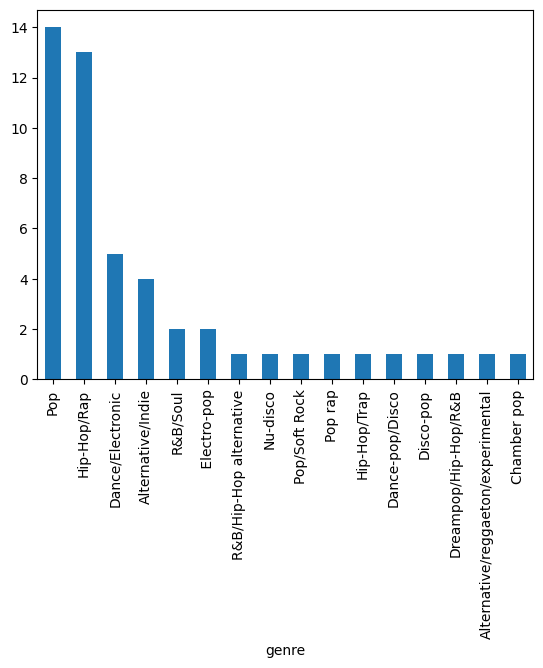

In [ ]:
df['genre'].value_counts().plot(kind='bar')

In [ ]:
most_popular = df['genre'].value_counts()
genre = most_popular[most_popular > 1]
top_genre = most_popular.idxmax()
top_count = most_popular.max()

print(f"The most popular genre is {top_genre} with {top_count} songs in Top 50.")
print(f'There is the list of genres with more than one song:')
print(genre.to_string(header=False))

The most popular genre is Pop with 14 songs in Top 50.
There is the list of genres with more than one song:
Pop                  14
Hip-Hop/Rap          13
Dance/Electronic      5
Alternative/Indie     4
R&B/Soul              2
 Electro-pop          2


**How many genres are in total and which genres have just one song in the Top 50?**

In [ ]:
unique_genre = df['genre'].nunique()
one_song = df['genre'].value_counts()
one_song = one_song[one_song ==1].index.to_list()

print(f'There are {unique_genre} genre in total.')
print(f"These genres have only one song: ")
print('\n'.join(one_song))


There are 16 genre in total.
These genres have only one song: 
R&B/Hip-Hop alternative
Nu-disco
Pop/Soft Rock
Pop rap
Hip-Hop/Trap
Dance-pop/Disco
Disco-pop
Dreampop/Hip-Hop/R&B
Alternative/reggaeton/experimental
Chamber pop


Pop is the most dominant genre in the Top 50 songs with 14 tracks, followed by Hip-Hop/Rap with 13 tracks. While these two genres lead, the list is very diverse, with many genres represented by just one song. This shows that the Top 50 includes songs from a wide range of genres.

# Feature Correlation Analysis
To better understand the relationships between audio features, I calculated the correlation matrix and identified which features are strongly positively, strongly negatively, or not at all correlated with each other.

In [ ]:
df_cleaned = df.drop(columns=['Unnamed: 0'])
correlation = df_cleaned.corr(numeric_only=True)
correlation.style.background_gradient()


,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.062428,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.285036,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
key,0.062428,0.285036,1.000000,-0.009178,-0.113394,-0.094965,0.020802,0.278672,0.120007,0.080475,-0.003345
loudness,0.791640,0.167147,-0.009178,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.113394,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.094965,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,0.020802,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,0.278672,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.120007,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.080475,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328


**Which features are strongly positively correlated?**

In [ ]:
df_cleaned = df.drop(columns=['Unnamed: 0'])
correlation = df_cleaned.corr(numeric_only=True)
corr_no_self = correlation[correlation != 1.0]
strong_positive = corr_no_self[corr_no_self > 0.6]

strong_positive_cleaned = strong_positive.stack().reset_index()
strong_positive_cleaned.columns = ['Feature_1', 'Feature_2', 'Correlation']

print(strong_positive_cleaned.loc[0])

Feature_1        energy
Feature_2      loudness
Correlation     0.79164
Name: 0, dtype: object


The correlation between energy and loudness is 0.79, indicating that songs that are more energetic are often louder as well. This suggests that energetic genres like Pop and Hip-Hop/Rap, which dominate the Top 50, are more likely to be loud and energetic.

**Which features are strongly negatively correlated?**

In [ ]:
df_cleaned = df.drop(columns=['Unnamed: 0'])
correlation = df_cleaned.corr(numeric_only=True)
strong_negative = correlation[correlation < -0.6]

strong_negative_cleaned = strong_negative.stack().reset_index()
strong_negative_cleaned.columns = ['Feature_1', 'Feature_2', 'Correlation']

print(strong_negative_cleaned.loc[0])

Feature_1            energy
Feature_2      acousticness
Correlation       -0.682479
Name: 0, dtype: object


The correlation between energy and acousticness is -0.68, indicating a strong negative relationship. This means that the more acoustic a song is, the less energetic it tends to be.

**Which features are not correlated?**

In [ ]:
df_cleaned = df.drop(columns=['Unnamed: 0'])
correlation = df_cleaned.corr(numeric_only=True)
no_correlation = correlation[(correlation > -0.1) & (correlation < 0.1)]

no_correlation_cleaned = no_correlation.stack().reset_index()
no_correlation_cleaned.columns = ['Feature_1', 'Feature_2', 'Correlation']
no_correlation_cleaned = no_correlation_cleaned.drop_duplicates(
    subset=['Correlation'], keep='first')
print(f'There {len(no_correlation_cleaned)} feature pairs with very low correlation.')
print(no_correlation_cleaned)

There 26 feature pairs with very low correlation.
           Feature_1         Feature_2  Correlation
0             energy               key     0.062428
1             energy       speechiness     0.074267
2             energy          liveness     0.069487
3             energy             tempo     0.075191
4             energy       duration_ms     0.081971
5       danceability  instrumentalness    -0.017706
6       danceability          liveness    -0.006648
7       danceability       duration_ms    -0.033763
9                key          loudness    -0.009178
10               key       speechiness    -0.094965
11               key  instrumentalness     0.020802
12               key             tempo     0.080475
13               key       duration_ms    -0.003345
15          loudness       speechiness    -0.021693
16          loudness          liveness    -0.069939
17          loudness       duration_ms     0.064130
18      acousticness       duration_ms    -0.010988
22       speec

 Most of the features in this group have very weak correlations (close to 0), which means they do not show any meaningful relationship with each other. This suggests that many audio features are quite independent and do not necessarily affect each other directly.

The Top 50 songs tend to follow certain trends, with energetic and loud songs being more common in genres like Pop and Hip-Hop/Rap. At the same time, there are a variety of songs with different acoustic and instrumental qualities, especially from genres like Alternative/Indie. While some features like energy and loudness are strongly related, many others remain independent, contributing to the diversity of the songs in the list.



# Genre Comparison of Audio Features
Let's compare the average values of three key audio features - danceability, loudness, and acousticness - across four main genres represented in the dataset:

In [ ]:
filtered_df = df[df['genre'].isin(
    ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie'])]
filtered_df.groupby('genre')[['danceability','loudness','acousticness']].mean()



,danceability,loudness,acousticness
genre,,,
Alternative/Indie,0.661750,-5.421000,0.583500
Dance/Electronic,0.755000,-5.338000,0.099440
Hip-Hop/Rap,0.765538,-6.917846,0.188741
Pop,0.677571,-6.460357,0.323843


**How does the danceability score compare?**

Hip-Hop/Rap (0.77) and Dance/Electronic (0.76) are the most danceable genres.
Pop (0.68) follows with slightly lower danceability.
Alternative/Indie (0.66) is the least danceable.


**How does the loudness score compare?**

Dance/Electronic (-5.34 dB) and Alternative/Indie (-5.42 dB) are louder than the rest.
Pop (-6.46 dB) and Hip-Hop/Rap (-6.92 dB) are a bit quieter on average.


**How does the acousticness score compare?**

Alternative/Indie (0.58) has the highest acousticness, reflecting its use of real instruments.
Pop (0.32) shows a balance between acoustic and synthetic sounds.
Hip-Hop/Rap (0.19) and Dance/Electronic (0.10) are the least acoustic genres.


 These genres are dominant in the top rankings, showing that energetic and rhythmic genres like Pop and Hip-Hop/Rap tend to appear more frequently in the Top 50. On the other hand, Dance/Electronic and Alternative/Indie genres, while less frequent, still manage to make it to the list, indicating a broader diversity in listener preferences


# Conclusions

**What Makes a Song Reach the Spotify Top 50?**

**Genre-wise**, Pop and Hip-Hop/Rap dominate the Top 50, making up more than half of the list. These genres likely align best with current listener preferences.

**Audio characteristics matter**:

* Hip-Hop/Rap shows the highest danceability, suggesting energetic, rhythm-driven songs perform well.

* Pop songs balance between acoustic and electronic elements, offering broad appeal.

**Popular artists** often appear multiple times, hinting that artist recognition and marketing power may boost a songs chances of entering the Top 50 - beyond just its audio features.

**Energy and loudness go hand in hand**: Loud tracks tend to be more energetic (correlation of 0.79), which aligns with mainstream musics focus on intensity and impact.

Most other features show weak or no correlation, meaning there is no strict formula - songs can differ widely and still be hits.

While many songs follow common trends (high energy, danceability, tempo), the list also includes outliers - acoustic, instrumental, or live-feeling tracks - showing that musical diversity is still valued by listeners.

# Suggestions for improving the analysis:
**Analyze track chart duration** - Determine whether certain songs are short-term hits or long-standing favorites.

**Include play count data** - To understand which songs actually attract the most listeners, beyond just appearing in the Top 50.

**Explore artist recurrence** - Investigate whether chart success is more strongly tied to the artist's name than to individual song features.

**Add release dates** - This would help analyze the impact of recency on chart placement.

**Compare with previous years data** - Analyze how genre and song characteristics have changed over time (e.g., comparing 2020 with 2019).

**Expand the analysis to Top 100** - A larger dataset could reveal broader trends and reduce the impact of outliers, offering a more complete picture of popular music trends.